In [50]:
import pandas as pd
# TODO: normalize so we have % of households making certain income and % of violations per ?? idk

income_df = pd.read_csv("../data/income/income_census_data.csv")
zip_df = pd.read_csv("../data/zip_df.csv", index_col=0)
income_df.head()


,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001EA,S1901_C01_001M,S1901_C01_001MA,S1901_C01_002E,S1901_C01_002M,S1901_C01_002MA,S1901_C01_002EA,...,S1901_C04_014EA,S1901_C04_015E,S1901_C04_015M,S1901_C04_015MA,S1901_C04_015EA,S1901_C04_016E,S1901_C04_016EA,S1901_C04_016M,S1901_C04_016MA,Unnamed: 258
0,Geography,Geographic Area Name,Estimate!!Households!!Total,Annotation of Estimate!!Households!!Total,Margin of Error!!Households!!Total,Annotation of Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000",Margin of Error!!Households!!Total!!Less than ...,Annotation of Margin of Error!!Households!!Tot...,Annotation of Estimate!!Households!!Total!!Les...,...,Annotation of Estimate!!Nonfamily households!!...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Annotation of Margin of Error!!Nonfamily house...,Annotation of Estimate!!Nonfamily households!!...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Annotation of Estimate!!Nonfamily households!!...,Margin of Error!!Nonfamily households!!PERCENT...,Annotation of Margin of Error!!Nonfamily house...,NaN
1,8600000US02108,ZCTA5 02108,2046,NaN,266,NaN,3.7,2.7,NaN,NaN,...,(X),(X),(X),(X),(X),31.7,NaN,(X),(X),NaN
2,8600000US02109,ZCTA5 02109,1892,NaN,211,NaN,2.7,2.3,NaN,NaN,...,(X),(X),(X),(X),(X),38.2,NaN,(X),(X),NaN
3,8600000US02110,ZCTA5 02110,1325,NaN,229,NaN,8.8,6.1,NaN,NaN,...,(X),(X),(X),(X),(X),24.5,NaN,(X),(X),NaN
4,8600000US02111,ZCTA5 02111,3626,NaN,378,NaN,15.3,4.5,NaN,NaN,...,(X),(X),(X),(X),(X),20.3,NaN,(X),(X),NaN


In [51]:
# Cleaning up the Census Income Data
#    NOTE: The census data only includes the top 20 zipcodes with the most violations

# Make first row the header (since this contains actual names of the columns)
income_df.columns = income_df.iloc[0]
income_df = income_df.drop(0)
# Remove all NaN columns from end (percentage data not available)
income_df = income_df.drop(columns=income_df.columns[54:])
# Remove all Annotation columns since they are all NaN
income_df = income_df.filter(regex='^((?!Annotation of).)*$')
# Remove prefix ZCTA5 from zipcode
income_df['Geographic Area Name'] = income_df['Geographic Area Name'].apply(lambda x: x[6:])
income_df = income_df.rename(columns={'Geographic Area Name': 'Location'})

#Modify column names?

#Convert columns to numeric values (they are strings not numbers)
income_df['Estimate!!Households!!Total!!Less than $10,000'] = income_df['Estimate!!Households!!Total!!Less than $10,000'].apply(lambda x: float(x))
income_df['Estimate!!Households!!Total!!$10,000 to $14,999'] = income_df['Estimate!!Households!!Total!!$10,000 to $14,999'].apply(lambda x: float(x))
income_df['Estimate!!Households!!Total!!$15,000 to $24,999'] = income_df['Estimate!!Households!!Total!!$15,000 to $24,999'].apply(lambda x: float(x))

#Make a new column
income_df["Estimate of Total Households $24,999 or Less"] = income_df['Estimate!!Households!!Total!!Less than $10,000'] + income_df['Estimate!!Households!!Total!!$10,000 to $14,999'] + income_df['Estimate!!Households!!Total!!$15,000 to $24,999']

income_df.head()




,Geography,Location,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Margin of Error!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to $24,999",...,"Margin of Error!!Households!!Total!!$100,000 to $149,999","Estimate!!Households!!Total!!$150,000 to $199,999","Margin of Error!!Households!!Total!!$150,000 to $199,999","Estimate!!Households!!Total!!$200,000 or more","Margin of Error!!Households!!Total!!$200,000 or more",Estimate!!Households!!Median income (dollars),Margin of Error!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Margin of Error!!Households!!Mean income (dollars),"Estimate of Total Households $24,999 or Less"
1,8600000US02108,02108,2046,266,3.7,2.7,1.5,1.3,0.0,1.9,...,6.2,15.2,7.4,36.9,8.7,152442,38135,256003,48603,5.2
2,8600000US02109,02109,1892,211,2.7,2.3,1.4,1.1,2.2,1.7,...,3.7,19.5,7.6,34.6,6.8,156119,11006,223066,30023,6.3
3,8600000US02110,02110,1325,229,8.8,6.1,3.1,2.9,1.1,1.9,...,12.4,9.3,5.7,33.7,9.6,111971,28722,283939,74620,13.0
4,8600000US02111,02111,3626,378,15.3,4.5,9.5,4.1,10.7,4.2,...,2.9,7.0,2.8,23.4,6.3,52663,20062,138477,33561,35.5
5,8600000US02113,02113,4286,397,2.7,1.6,2.5,1.6,3.4,1.6,...,4.8,10.2,2.4,14.8,4.0,97686,7795,137447,19823,8.6


In [52]:
# Merge the data frames
# TODO: Fix by using normal ciolations by zip (not top 20) and merge so only ones in boston are included
income_df.shape

income_violations_zip = income_df.merge(zip_df, on = 'Location') # we only want to keep data that is in the income data? or both
income_violations_zip.head(33)

,Geography,Location,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Margin of Error!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to $24,999",...,"Estimate of Total Households $24,999 or Less",Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total
0,8600000US02108,02108,2046,266,3.7,2.7,1.5,1.3,0.0,1.9,...,5.2,1,0,0,0,0,0,0,1,2
1,8600000US02109,02109,1892,211,2.7,2.3,1.4,1.1,2.2,1.7,...,6.3,0,0,0,0,0,0,0,5,5
2,8600000US02110,02110,1325,229,8.8,6.1,3.1,2.9,1.1,1.9,...,13.0,0,0,1,1,0,0,0,1,3
3,8600000US02111,02111,3626,378,15.3,4.5,9.5,4.1,10.7,4.2,...,35.5,0,0,0,0,0,0,0,4,4
4,8600000US02113,02113,4286,397,2.7,1.6,2.5,1.6,3.4,1.6,...,8.6,0,0,3,1,0,0,0,0,4
5,8600000US02114,02114,7235,466,6.3,1.8,4.4,2.1,4.6,2.0,...,15.3,5,0,13,9,0,0,5,45,77
6,8600000US02115,02115,9276,693,17.1,2.6,10.5,2.4,9.6,2.1,...,37.2,0,0,2,2,0,0,0,6,10
7,8600000US02116,02116,12014,595,8.7,1.9,5.3,1.5,4.4,1.2,...,18.4,0,0,2,5,0,0,0,11,18
8,8600000US02118,02118,13672,658,12.9,2.9,9.1,2.9,11.0,2.4,...,33.0,9,0,8,4,0,0,0,22,43
9,8600000US02119,02119,11738,681,21.1,3.2,10.9,2.1,12.2,2.9,...,44.2,16,0,11,8,0,0,1,29,65


In [54]:
income_violations_zip.columns.get_loc("Estimate of Total Households $24,999 or Less")
income_violations_zip.columns.get_loc("Total")

37

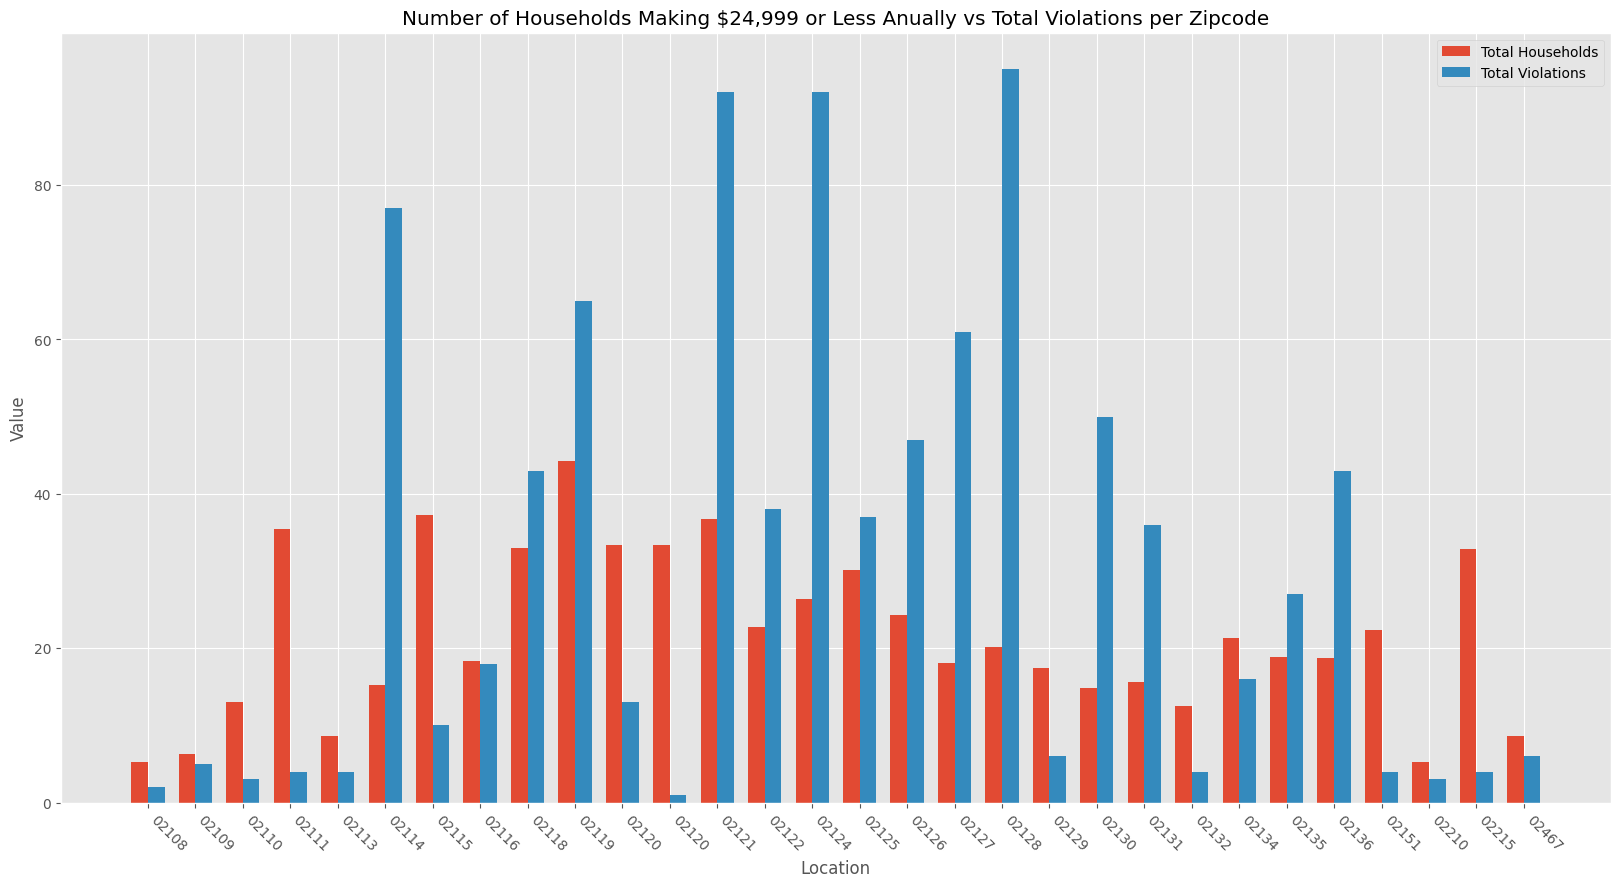

In [57]:
# Try Plotting something
# Maybe do percetage of households at x dollars vs normalized total?
# Or total vs. number households ina specific income bracket
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# visualization
# Set the style for the plot
plt.style.use('ggplot')

bar_width = 0.35

# Create the x values
locations = np.arange(len(income_violations_zip['Location']))

# # Create a bar chart
fig, ax = plt.subplots(figsize=(20, 10))

bar1 = ax.bar(locations - bar_width/2,income_violations_zip['Estimate of Total Households $24,999 or Less'], bar_width, label='Total Households' )
bar2 = ax.bar(locations + bar_width/2, income_violations_zip['Total'], bar_width, label='Total Violations')

#/int(income_violations_zip['Estimate!!Households!!Total'])

# Set labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Value')
ax.set_title('Number of Households Making $24,999 or Less Anually vs Total Violations per Zipcode')
ax.set_xticks(locations)
ax.set_xticklabels(income_violations_zip['Location'])
plt.xticks(rotation=-45, ha = 'left')
ax.legend()

# Display the plot
plt.show()

/Users/isa/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


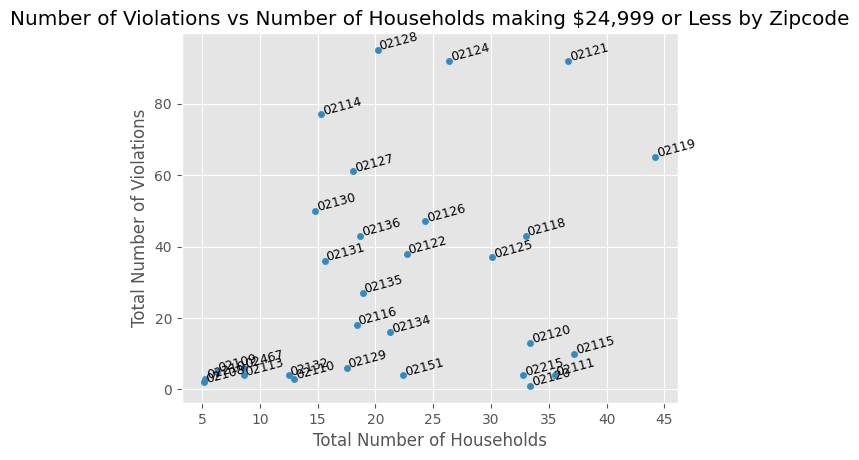

In [55]:
import matplotlib.pyplot as plt

income_violations_zip.plot.scatter(x='Estimate of Total Households $24,999 or Less', y='Total', colormap='viridis')
plt.title("Number of Violations vs Number of Households making $24,999 or Less by Zipcode")
plt.xlabel("Total Number of Households")
plt.ylabel("Total Number of Violations")

#Total violations and number of households
for i, txt in enumerate(income_violations_zip['Location']):
    plt.annotate(txt, (income_violations_zip.iat[i, 28], income_violations_zip.iat[i, 37]), fontsize = 9, ha = 'left',rotation = 15)


plt.show()